In [4]:
'''Bagging and Pasting '''
# Importing the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
# Split the data into a training set and a test set
x, y = make_moons(n_samples=1000, noise=0.25)
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train.shape

(750, 2)

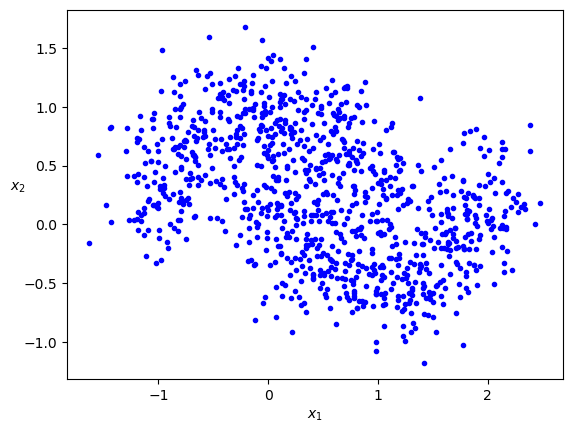

In [9]:
plt.plot(x[:,0],x[:,1],'.b')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$",rotation=0)
plt.show()

In [72]:
bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=450,max_samples=90,
                               n_jobs=-1,oob_score=True)
bagging_clf.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=90,
                  n_estimators=450, n_jobs=-1, oob_score=True)

In [14]:
# Now plot to compare the bagging clf to the tree clf:
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(x_train,y_train)

DecisionTreeClassifier()

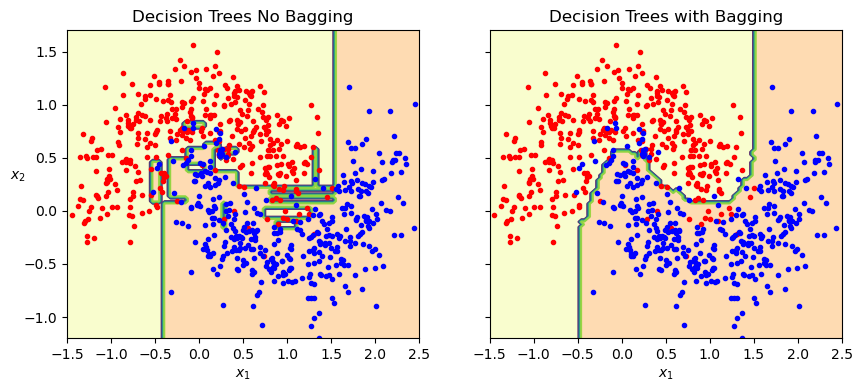

In [71]:
def decision_boundary_plot(clf,x,y,alpha=1.0):
    axes=[-1.5, 2.5, -1.2, 1.7]
    x1,x2 = np.meshgrid(np.linspace(axes[0],
                                   axes[1],120),
    np.linspace(axes[2],axes[3],120))
    x_topredict = np.c_[x1.ravel(),x2.ravel()]
    y_predicted = clf.predict(x_topredict).reshape(x1.shape)
    plt.contourf(x1,x2,y_predicted,alpha=0.3 * alpha,cmap='Wistia')
    plt.contour(x1,x2,y_predicted,alpha=0.8 * alpha)
    for idx,style in (zip((0,1),('r.','b.'))):
        plt.plot(x[:,0][y==idx],x[:,1][y==idx],style)
fig, ax = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(ax[0])
decision_boundary_plot(dtree_clf,x_train,y_train)
plt.title("Decision Trees No Bagging")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$", rotation=0)


plt.sca(ax[1])
decision_boundary_plot(bagging_clf,x_train,y_train)
plt.title("Decision Trees with Bagging")
plt.xlabel(r"$x_1$")
plt.show()

In [ ]:
"""Conclusion
The ensemble’s predictions (with Bagging) will  generalize  better than the 
single decision tree’s predictions: the ensemble has a comparable bias but 
a smaller variance(it makes about the same number of errors on the training
set, but the decision boundary is less irregular"""

In [73]:
# The evaluation score on the training set is 93% accuracy
bagging_clf.oob_score_

0.9306666666666666

In [75]:
# Finding probabilities for first 3 instances
bagging_clf.oob_decision_function_[:3]

array([[1.        , 0.        ],
       [0.65743073, 0.34256927],
       [0.8790932 , 0.1209068 ]])

In [78]:
# Confirm with accurcy score using test set
from sklearn.metrics import accuracy_score
y_predicted2 = bagging_clf.predict(x_test)
accuracy_score(y_test,y_predicted2)

0.96

In [79]:
pwd

'/Users/marxakl/Documents/DataScience/HandsOnML/Ch7EnsembleLearningRandomForests'